In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df = pd.read_csv('dataset_part2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


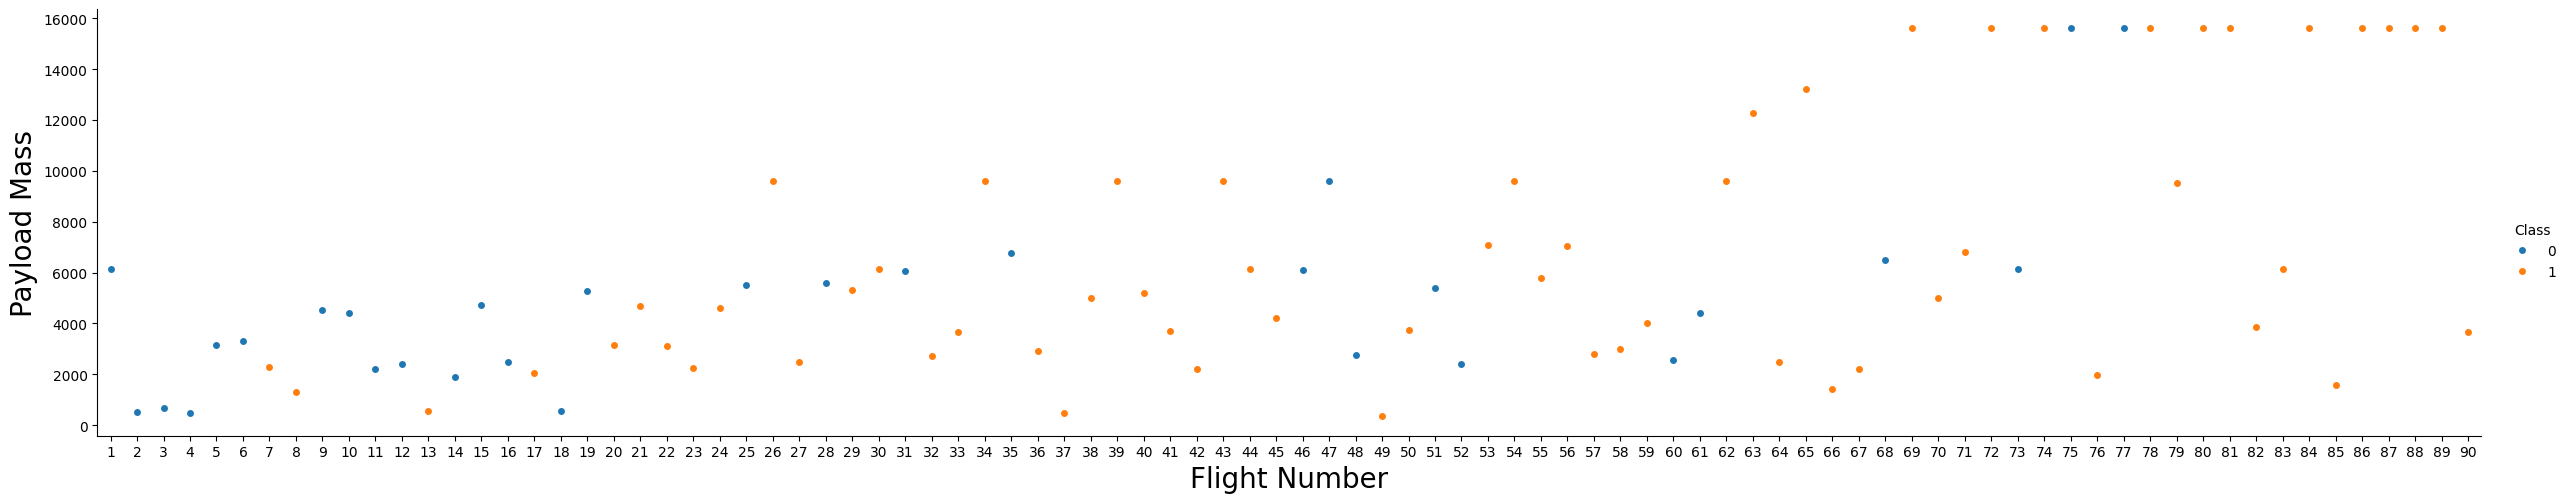

In [13]:
sns.catplot(y='PayloadMass',x='FlightNumber',data=df,hue='Class',aspect=5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Payload Mass',fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


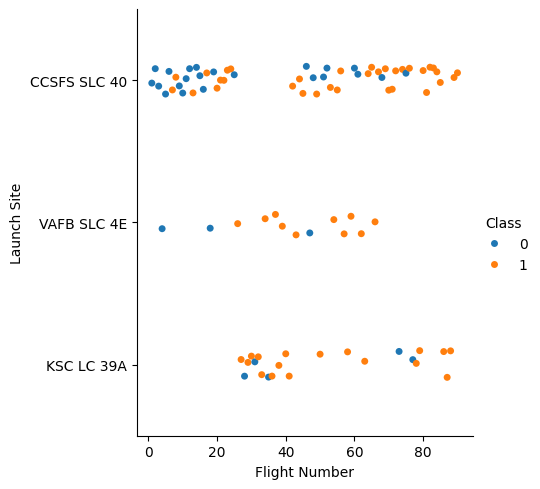

In [18]:
sns.catplot(x='FlightNumber',y='LaunchSite',data=df,hue='Class') # Cat = Categorical
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

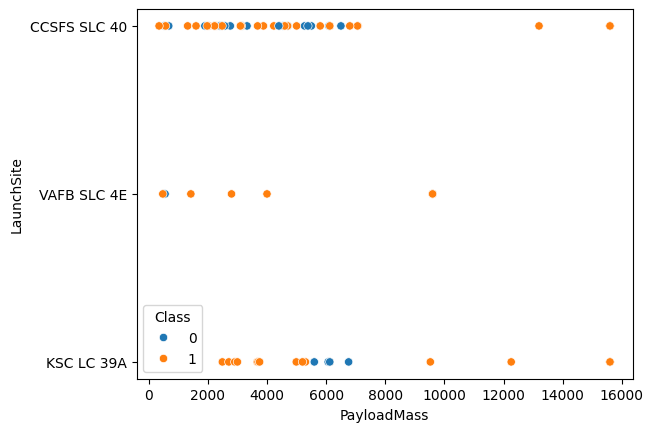

In [19]:
sns.scatterplot(x='PayloadMass',y='LaunchSite',data=df,hue='Class')

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


Hint: Use `groupby` on Orbit column and get the mean of Class column

<Axes: xlabel='Orbit', ylabel='Class'>

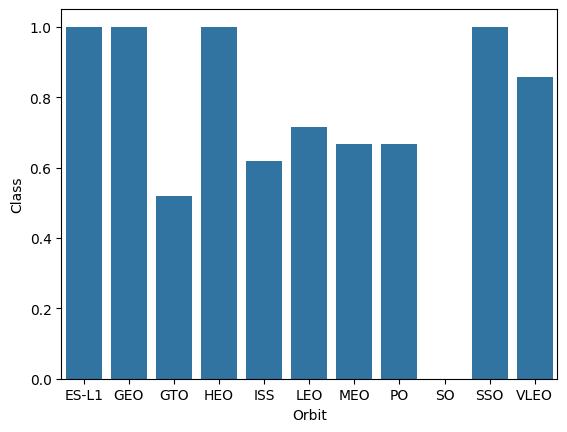

In [56]:
orbit_avg = df.groupby('Orbit')['Class'].mean()

sns.barplot(data=orbit_avg)

Analyze the ploted bar chart try to find which orbits have high sucess rate.


INSIGHTS:

Orbits that have hight success rate
- `ES-L1`
- `GEO`
- `HEO`
- `SSO`

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


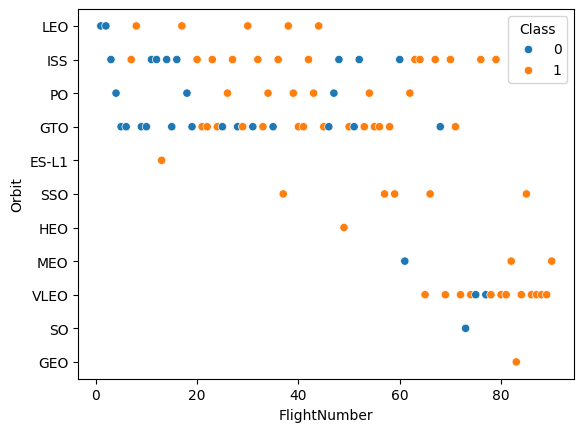

In [58]:
sns.scatterplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


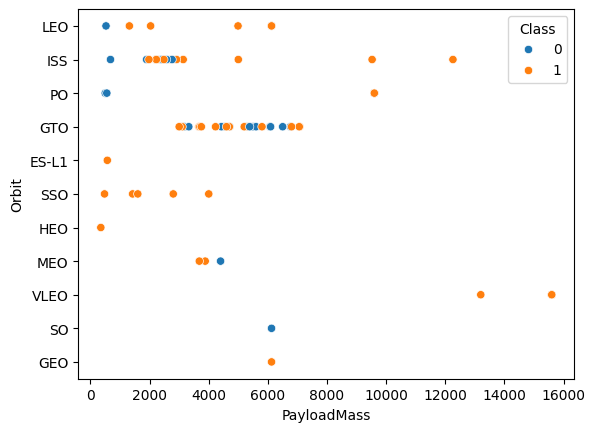

In [60]:
sns.scatterplot(x='PayloadMass',y='Orbit',data=df,hue='Class')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [80]:
year = []
def Extract_year():
    for i in df['Date']:
        year.append(i.split('-')[0])
    return year

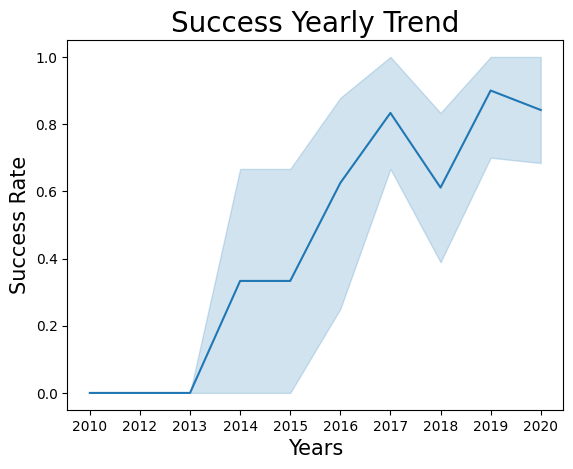

In [106]:
sns.lineplot(x=year,y='Class',data=df)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Success Rate',fontsize=15)
plt.title('Success Yearly Trend',fontsize=20)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.
